<a href="https://colab.research.google.com/github/surf0123/python/blob/main/%EA%B0%95%EB%8F%99%EA%B3%A0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8909 - loss: 0.3432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9843 - loss: 0.0513
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9932 - loss: 0.0227
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0185
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0431
테스트 정확도: 0.9894999861717224


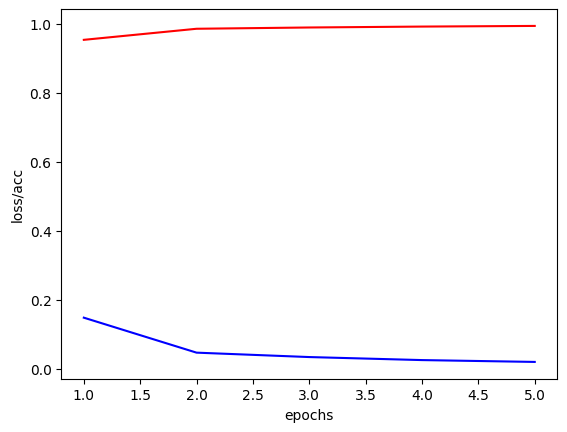

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
추정된 숫자= 7


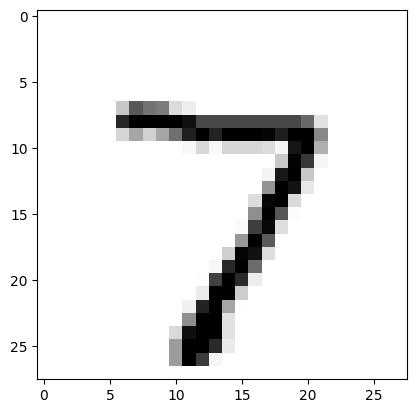

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

import matplotlib.pyplot as plt

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

pred = model.predict(test_images[0].reshape(1,28,28,1), batch_size=1)
print("추정된 숫자=", pred.argmax())
plt.imshow(test_images[0], cmap="Greys")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
추정된 숫자= 6


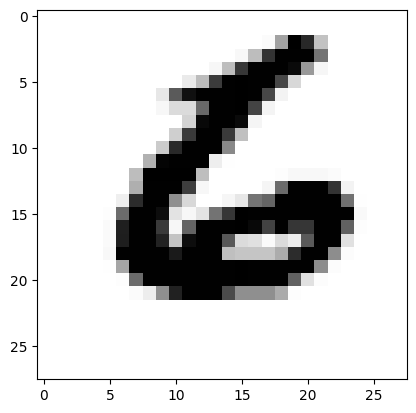

In [ ]:
pred = model.predict(test_images[9999].reshape(1,28,28,1), batch_size=1)
print("추정된 숫자=", pred.argmax())
plt.imshow(test_images[9999], cmap="Greys")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
추정된 숫자= 1


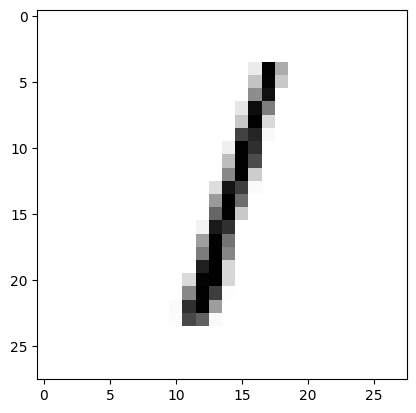

In [ ]:
# 테스트 영상 순서 0~9999 중 선택
pred = model.predict(test_images[2].reshape(1,28,28,1), batch_size=1)
print("추정된 숫자=", pred.argmax())
plt.imshow(test_images[2], cmap="Greys")


이미지 파일 업로드


Saving num4.jpg to num4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted: 4


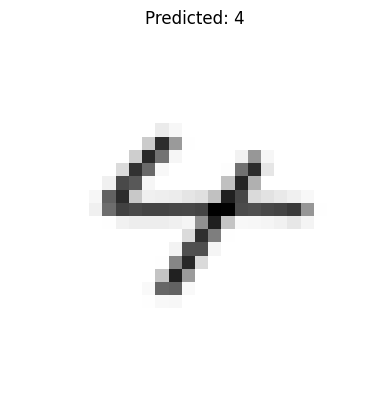

In [ ]:
# 나의 필기체 숫자 입력과 인식
from google.colab import files
from PIL import Image
import numpy as np

print("이미지 파일 업로드")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 업로드한 이미지를 MNIST 입력 형태로 전처리
def preprocess_user_image(path):
    img = Image.open(path).convert("L")   # 흑백 변환
    img = img.resize((28, 28))           # MNIST 크기
    img = np.array(img)

    # MNIST는 글씨(흰색) / 배경(검은색) → 반전 필요할 수 있음
    if np.mean(img) > 127:
        img = 255 - img

    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

sample = preprocess_user_image(img_path)

# 예측
pred = model.predict(sample)
print("Predicted:", np.argmax(pred))

# 출력
plt.imshow(sample.reshape(28,28), cmap="Greys")
plt.title(f"Predicted: {np.argmax(pred)}")
plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

print("이미지 파일 업로드")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 업로드한 이미지를 MNIST 입력 형태로 전처리
def preprocess_user_image(path):
    img = Image.open(path).convert("L")   # 흑백 변환
    img = img.resize((28, 28))           # MNIST 크기
    img = np.array(img)

    # MNIST는 글씨(흰색) / 배경(검은색) → 반전 필요할 수 있음
    if np.mean(img) > 127:
        img = 255 - img

    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

sample = preprocess_user_image(img_path)

# 예측
pred = model.predict(sample)
print("Predicted:", np.argmax(pred))

# 출력
plt.imshow(sample.reshape(28,28), cmap="Greys")
plt.title(f"Predicted: {np.argmax(pred)}")
plt.axis("off")
plt.show()

VGG Net

Saving shark.jpg to shark.jpg
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted: [('n01484850', 'great_white_shark', np.float32(0.9822136)), ('n01491361', 'tiger_shark', np.float32(0.017435782)), ('n01494475', 'hammerhead', np.float32(0.00028263708))]


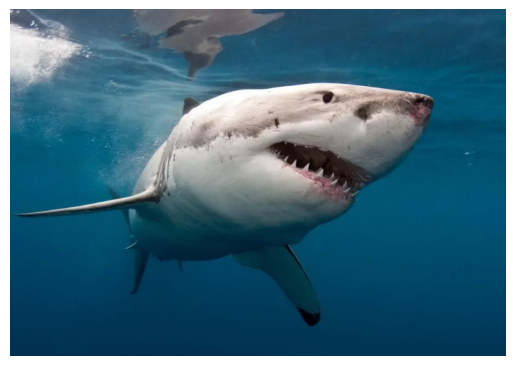

In [ ]:
from google.colab import files
from keras.applications import vgg16
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# 1) 이미지 업로드
uploaded = files.upload()       # 업로드 창이 뜸
image_path = list(uploaded.keys())[0]

# 2) 이미지 전처리 함수
def preprocess_image(image_path, target_size=None):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg16.preprocess_input(img)
    return img

# 3) VGG16 모델 불러오기
base_model = vgg16.VGG16(weights='imagenet', include_top=True)
base_model.summary()


# 4) 업로드한 이미지 예측
img_preprocessed = preprocess_image(image_path, target_size=(224, 224))
preds = base_model.predict(img_preprocessed)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

# 5) 이미지 표시
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

ResNet

Saving shark.jpg to shark.jpg
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[('n01484850', 'great_white_shark', np.float32(0.9886856)), ('n01491361', 'tiger_shark', np.float32(0.0112726055)), ('n01494475', 'hammerhead', np.float32(2.176955e-05))]


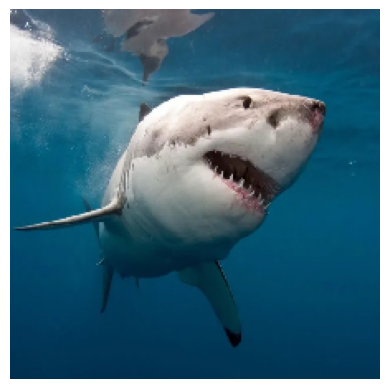

In [ ]:
from google.colab import files
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1) 이미지 업로드
uploaded = files.upload()   # 파일 업로드 창이 뜸
img_path = list(uploaded.keys())[0]

# 2) 모델 불러오기
model = tf.keras.applications.resnet50.ResNet50()
model.summary()

# 3) 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

# 4) 예측
prediction = model.predict(img_preprocessed)
print(decode_predictions(prediction, top=3)[0])

# 5) 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

영화리뷰

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(x_train[0])

# 단어 ->정수 인덱스 딕셔너리
word_to_index = imdb.get_word_index()

# 처음 몇 개의 인덱스는 특수 용도로 사용된다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
word_to_index["<PAD>"] = 0		# 문장을 채우는 기호
word_to_index["<START>"] = 1		# 시작을 표시
word_to_index["<UNK>"] = 2  		# 알려지지 않은 토큰
word_to_index["<UNUSED>"] = 3

index_to_word = dict([(value, key) for (key, value) in word_to_index.items()])

print(' '.join([index_to_word[index] for index in x_train[0]]))

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 64,  input_length=100))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1,
          validation_data=(x_test, y_test))

results = model.evaluate(x_test, y_test, verbose=2)
print(results)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1641221/1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6595 - loss: 0.5785 - val_accuracy: 0.8488 - val_loss: 0.3385
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9318 - loss: 0.1839 - val_accuracy: 0.8276 - val_loss: 0.4094
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0333 - val_accuracy: 0.8343 - val_loss: 0.5245
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9987 - loss: 0.0073 - val_accuracy: 0.8362 - val_loss: 0.6169
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.8378 - val_loss: 0.6659
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 8.9857e-04 - val_accuracy: 0.8384 - val_loss: 0.7017
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.8508e-04 - val_accuracy: 0.8395 - val_loss: 0.7311
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 4.6331e-04 - val_

In [ ]:
review =( " I hate the movie because it is so dirty")

"""
		 "What can I say about this movie that was already said? It is my "
"favorite time travel sci-fi, adventure epic comedy in the 80's and I love "
"this movie to death! When I saw this movie I was thrown out by its theme. An "
"excellent sci-fi, adventure epic, I LOVE the 80s. It's simple the greatest time "
"travel movie ever happened in the history of world cinema. I love this movie to "
"death, I love, LOVE, love it!")
"""

import re
review = re.sub("[^0-9a-zA-Z ]", "", review).lower()

review_encoding = []
# 리뷰의 각 단어 대하여 반복한다.
for w in review.split():
		index = word_to_index.get(w, 2)	# 딕셔너리에 없으면 2 반환
		if index <= 10000:		# 단어의 개수는 10000이하
			review_encoding.append(index)
		else:
			review_encoding.append(word_to_index["UNK"])

# 2차원 리스트로 전달하여야 한다.
test_input = pad_sequences([review_encoding], maxlen = 100)
value = model.predict(test_input) # 예측
if(value > 0.5):
	print("긍정적인 리뷰입니다.")
else:
	print("부정적인 리뷰입니다.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
부정적인 리뷰입니다.


In [ ]:
!pip install nltk


#스팸분류

import numpy as np
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

docs = [	'additional income',
		'best price',
		'big bucks',
		'cash bonus',
		'earn extra cash',
		'spring savings certificate',
		'valero gas marketing',
		'all domestic employees',
		'nominations for oct',
		'confirmation from spinner']

labels = np.array([1,1,1,1,1,0,0,0,0,0])

vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_docs, labels, epochs=50, verbose=0)
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('정확도=', accuracy)


#test
test_doc = ['big income']
encoded_docs = [one_hot(d, vocab_size) for d in test_doc]
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(model.predict(padded_docs))

#영화리뷰

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(x_train[1])

# 단어 ->정수 인덱스 딕셔너리
word_to_index = imdb.get_word_index()

# 처음 몇 개의 인덱스는 특수 용도로 사용된다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
word_to_index["<PAD>"] = 0		# 문장을 채우는 기호
word_to_index["<START>"] = 1		# 시작을 표시
word_to_index["<UNK>"] = 2  		# 알려지지 않은 토큰
word_to_index["<UNUSED>"] = 3

index_to_word = dict([(value, key) for (key, value) in word_to_index.items()])

print(' '.join([index_to_word[index] for index in x_train[0]]))

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 64,  input_length=100))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1,
          validation_data=(x_test, y_test))

results = model.evaluate(x_test, y_test, verbose=2)
print(results)


#test
review =( "What can I say about this movie that was already said? It is my "
"favorite time travel sci-fi, adventure epic comedy in the 80's and I love "
"this movie to death! When I saw this movie I was thrown out by its theme. An "
"excellent sci-fi, adventure epic, I LOVE the 80s. It's simple the greatest time "
"travel movie ever happened in the history of world cinema. I love this movie to "
"death, I love, LOVE, love it!")


import re
review = re.sub("[^0-9a-zA-Z ]", "", review).lower()

review_encoding = []
# 리뷰의 각 단어 대하여 반복한다.
for w in review.split():
		index = word_to_index.get(w, 2)	# 딕셔너리에 없으면 2 반환
		if index <= 10000:		# 단어의 개수는 10000이하
			review_encoding.append(index)
		else:
			review_encoding.append(word_to_index["UNK"])

# 2차원 리스트로 전달하여야 한다.
test_input = pad_sequences([review_encoding], maxlen = 100)
value = model.predict(test_input) # 예측
if(value > 0.5):
	print("긍정적인 리뷰입니다.")
else:
	print("부정적인 리뷰입니다.")


[[17, 41], [47, 28], [42, 35], [25, 2], [10, 31, 25], [38, 18, 5], [22, 37, 10], [25, 17, 22], [23, 10, 22], [6, 48, 41]]
[[17 41  0  0]
 [47 28  0  0]
 [42 35  0  0]
 [25  2  0  0]
 [10 31 25  0]
 [38 18  5  0]
 [22 37 10  0]
 [25 17 22  0]
 [23 10 22  0]
 [ 6 48 41  0]]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

정확도= 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
[[0.5743869]]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6726 - loss: 0.5702 - val_accuracy: 0.8490 - val_loss: 0.3444
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9359 - loss: 0.1840 - val_accuracy: 0.8333 - val_loss: 0.4065
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9920 - loss: 0.0352 - val_accuracy: 0.8272 - val_loss: 0.5335
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9981 - loss: 0.0088 - val_accuracy: 0.8330 - val_loss: 0.6160
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.8328 - val_loss: 0.6792
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.8343 - val_loss: 0.7027
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 7.4470e-04 - val_accuracy: 0.8338 - val_loss: 0.7455
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 6.1992e-04 - val_accu

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
text = """Deep learning is part of a broader family of machine learning methods
	based on artificial neural networks with representation learning."""

t.fit_on_texts([text])
print("단어집합 : ", t.word_index)

seq = t.texts_to_sequences([text])[0]
print(text,"->", seq)


from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences([[7, 8, 9], [1, 2, 3, 4, 5], [7]], maxlen=3, padding='pre')
print(X)



단어집합 :  {'learning': 1, 'of': 2, 'deep': 3, 'is': 4, 'part': 5, 'a': 6, 'broader': 7, 'family': 8, 'machine': 9, 'methods': 10, 'based': 11, 'on': 12, 'artificial': 13, 'neural': 14, 'networks': 15, 'with': 16, 'representation': 17}
Deep learning is part of a broader family of machine learning methods
	based on artificial neural networks with representation learning. -> [3, 1, 4, 5, 2, 6, 7, 8, 2, 9, 1, 10, 11, 12, 13, 14, 15, 16, 17, 1]


ValueError: `sequences` must be a list of iterables. Found non-iterable: 3

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(x_train[5])
print(y_train[5])

# 단어 ->정수 인덱스 딕셔너리
word_to_index = imdb.get_word_index()

# 처음 몇 개의 인덱스는 특수 용도로 사용된다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
word_to_index["<PAD>"] = 0		# 문장을 채우는 기호
word_to_index["<START>"] = 1		# 시작을 표시
word_to_index["<UNK>"] = 2  		# 알려지지 않은 토큰
word_to_index["<UNUSED>"] = 3

index_to_word = dict([(value, key) for (key, value) in word_to_index.items()])

print(' '.join([index_to_word[index] for index in x_train[5]]))

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
0
<START> begins better than it ends funny that the russian submarine crew <UNK> all other actors it's like those scenes where documentary shots br br spoiler part the message <UNK> was contrary to the whole story it just does not <UNK> br br
